<a href="https://colab.research.google.com/github/adityagupta1707/Data-Science-January/blob/Data-Science/Shark_Tank_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, 
#often employing data visualization methods.


import numpy as np # linear algebra
import pandas as pd # for data preparation
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.7 MB/s 
     |████████████████████████████████| 16.7 MB 361 kB/s 
     |████████████████████████████████| 6.3 MB 22.8 MB/s 


In [8]:
shark_tank=pd.read_csv("https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/Shark%20Tank%20India/SharkTank-Final.csv")

In [9]:
shark_tank.head()

,Season,Episode,Company,Idea,Deal,Receive_Offer,Reject_Offer,Number of presenters,No of male presenters,No of female presenters,...,AshneerGrover_deal,AnupamMittal_deal,AmanGupta_deal,NamitaThapar_deal,VineetaSingh_deal,PeyushBansal_deal,GhazalAlagh_deal,Number of Sharks invested,Amount per Shark,Equity per Shark
0,1,1,BluePine Industries,Frozen Momos,1,1,0.0,3,2,1,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,1,Booz scooters,Renting e-bike for mobility in private spaces,1,1,0.0,1,1,0,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,1,Heart up my Sleeves,Detachable Sleeves,1,1,0.0,1,0,1,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,1,2,Tagz Foods,Healthy Potato Chips,1,1,0.0,2,2,0,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,1,2,Head and Heart,Brain Development Course,0,0,NaN,4,1,3,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [10]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season                     121 non-null    int64  
 1   Episode                    121 non-null    int64  
 2   Company                    121 non-null    object 
 3   Idea                       121 non-null    object 
 4   Deal                       121 non-null    int64  
 5   Receive_Offer              121 non-null    int64  
 6   Reject_Offer               87 non-null     float64
 7   Number of presenters       121 non-null    int64  
 8   No of male presenters      121 non-null    int64  
 9   No of female presenters    121 non-null    int64  
 10  Ask_Amount (INR Lakhs)     121 non-null    float64
 11  Ask_Equity                 121 non-null    float64
 12  Ask_Valuation (INR Lakhs)  121 non-null    float64
 13  Deal_Amount (INR Lakhs)    121 non-null    float64

In [11]:
shark_tank.isna().sum()

Season                        0
Episode                       0
Company                       0
Idea                          0
Deal                          0
Receive_Offer                 0
Reject_Offer                 34
Number of presenters          0
No of male presenters         0
No of female presenters       0
Ask_Amount (INR Lakhs)        0
Ask_Equity                    0
Ask_Valuation (INR Lakhs)     0
Deal_Amount (INR Lakhs)       0
Deal_Equity                   0
Deal_Valuation                0
AshneerGrover_present         0
AnupamMittal_present          0
AmanGupta_present             0
NamitaThapar_present          0
VineetaSingh_present          0
PeyushBansal_present          0
GhazalAlagh_present           0
AshneerGrover_deal            0
AnupamMittal_deal             0
AmanGupta_deal                0
NamitaThapar_deal             0
VineetaSingh_deal             0
PeyushBansal_deal             0
GhazalAlagh_deal              0
Number of Sharks invested     0
Amount p

In [13]:
shark_tank=shark_tank.fillna(0)

In [14]:
shark_tank.isna().sum()

Season                       0
Episode                      0
Company                      0
Idea                         0
Deal                         0
Receive_Offer                0
Reject_Offer                 0
Number of presenters         0
No of male presenters        0
No of female presenters      0
Ask_Amount (INR Lakhs)       0
Ask_Equity                   0
Ask_Valuation (INR Lakhs)    0
Deal_Amount (INR Lakhs)      0
Deal_Equity                  0
Deal_Valuation               0
AshneerGrover_present        0
AnupamMittal_present         0
AmanGupta_present            0
NamitaThapar_present         0
VineetaSingh_present         0
PeyushBansal_present         0
GhazalAlagh_present          0
AshneerGrover_deal           0
AnupamMittal_deal            0
AmanGupta_deal               0
NamitaThapar_deal            0
VineetaSingh_deal            0
PeyushBansal_deal            0
GhazalAlagh_deal             0
Number of Sharks invested    0
Amount per Shark             0
Equity p

In [18]:
shark_tank['Deal '].value_counts()

1    67
0    54
Name: Deal , dtype: int64

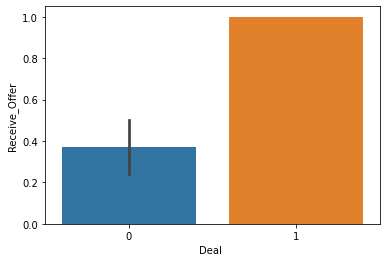

In [19]:
sns.barplot(shark_tank['Deal '],shark_tank['Receive_Offer'])

In [ ]:
#Lets find out the number of deals in which sharks were present

In [20]:

shark_tank['AshneerGrover_present'].value_counts()

1    98
0    23
Name: AshneerGrover_present, dtype: int64

In [21]:
shark_tank['AnupamMittal_present'].value_counts()

1    121
Name: AnupamMittal_present, dtype: int64

In [23]:
shark_tank['AmanGupta_present'].value_counts()

1    102
0     19
Name: AmanGupta_present, dtype: int64

In [24]:
Ashneer_present=len(df[df.AshneerGrover_present==1])
Anupam_present=len(df[df.AnupamMittal_present==1])
Aman_present=len(df[df.AmanGupta_present==1])
Namita_present=len(df[df.NamitaThapar_present==1])
Vinneta_present=len(df[df.VineetaSingh_present==1])
Peyush_present=len(df[df.PeyushBansal_present==1])
Ghazal_present=len(df[df.GhazalAlagh_present==1])

In [27]:
Vinneta_present

70

In [28]:
Ghazal_present

26

In [ ]:
#Representing the above data in the form of bar graph

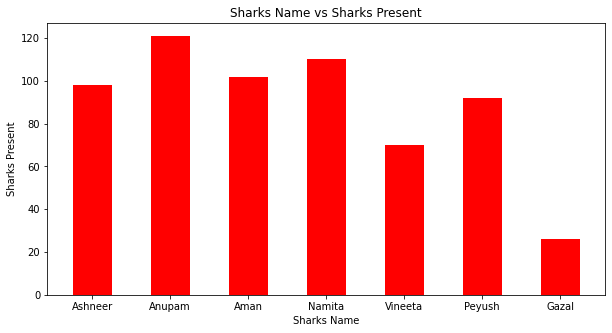

In [38]:
fig=plt.figure(figsize=(10,5))
present=[Ashneer_present,Anupam_present,Aman_present,Namita_present,Vinneta_present,Peyush_present,Ghazal_present]
name=['Ashneer','Anupam','Aman','Namita','Vineeta','Peyush','Gazal']
plt.bar(name,present,color='red',width=0.5)
plt.xlabel("Sharks Name")
plt.ylabel("Sharks Present")
plt.title("Sharks Name vs Sharks Present")
plt.show()

Text(0.55, 1.15, '% of Candidates present ')

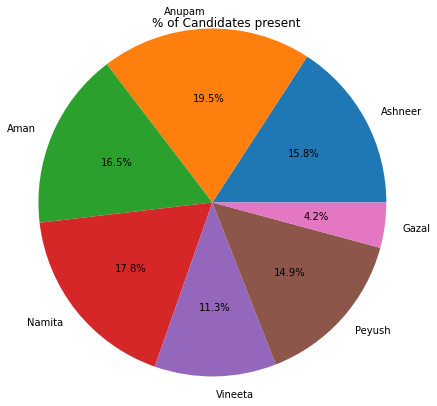

In [39]:
plt.pie(present,labels=name,radius=2,autopct='%0.1f%%')
plt.suptitle('% of Candidates present ',x=0.55,y=1.15)

In [40]:
aman_deal = len(shark_tank[shark_tank.AmanGupta_deal == 1])
anupam_deal = len(shark_tank[shark_tank.AnupamMittal_deal == 1])
ashneer_deal = len(shark_tank[shark_tank.AshneerGrover_deal == 1])
ghazal_deal = len(shark_tank[shark_tank.GhazalAlagh_deal == 1])
namita_deal = len(shark_tank[shark_tank.NamitaThapar_deal == 1])
peyush_deal = len(shark_tank[shark_tank.PeyushBansal_deal == 1])
vineeta_deal = len(shark_tank[shark_tank.VineetaSingh_deal == 1])

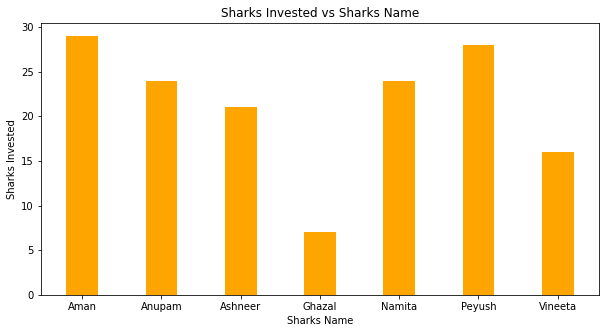

In [41]:
fig = plt.figure(figsize = (10, 5))
deal = [aman_deal, anupam_deal, ashneer_deal, ghazal_deal,
namita_deal, peyush_deal, vineeta_deal]
names = ['Aman','Anupam', 'Ashneer', 'Ghazal', 'Namita', 'Peyush', 'Vineeta']
plt.bar(names, deal, color ='orange',width = 0.4)
plt.xlabel("Sharks Name")
plt.ylabel("Sharks Invested")
plt.title("Sharks Invested vs Sharks Name")
plt.show()

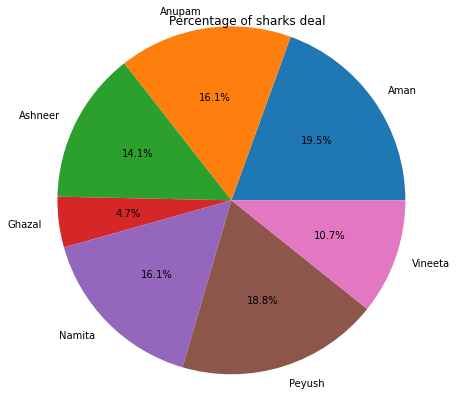

In [43]:
plt.pie(deal,labels=names,radius=2,autopct='%0.1f%%')
plt.suptitle('Percentage of sharks deal',x=0.55,y=1.15)
plt.show()

In [44]:
#percentage of inventments
aman_percent = (aman_deal/Aman_present)*100
anupam_percent = (anupam_deal/Anupam_present)*100
ashneer_percent = (ashneer_deal/Ashneer_present)*100
ghazal_percent = (ghazal_deal/Ghazal_present)*100
namita_percent = (namita_deal/Namita_present)*100
peyush_percent = (peyush_deal/Peyush_present)*100
vineeta_percent = (vineeta_deal/Vinneta_present)*100

Text(0.5, 1.0, 'Sharks Deal-percentage vs name')

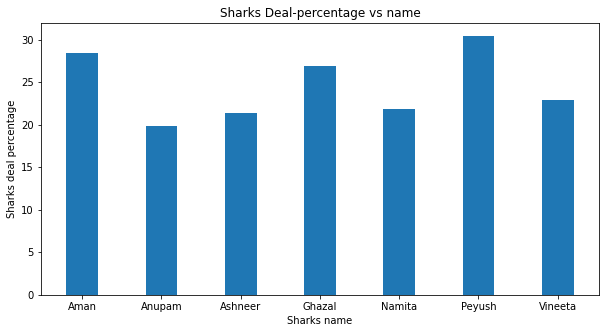

In [46]:
fig = plt.figure(figsize = (10, 5))
percentage=[aman_percent,anupam_percent,ashneer_percent,ghazal_percent,namita_percent,peyush_percent,vineeta_percent]
plt.bar(names,percentage,width=0.4)
plt.xlabel('Sharks name')
plt.ylabel('Sharks deal percentage')
plt.title('Sharks Deal-percentage vs name')

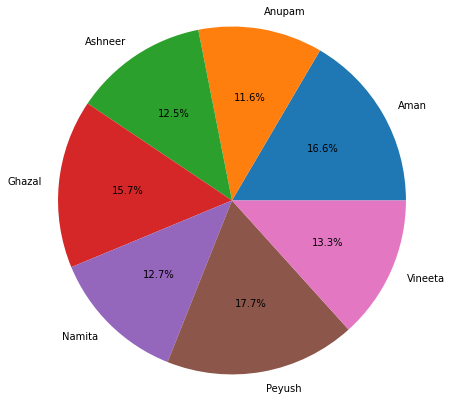

In [47]:
plt.pie(percentage,labels=names,radius=2,autopct='%0.1f%%')
plt.show()